## Demo analysis of MuSiC manual
MuSiC requires raw read counts for both bulk and single-cell expression. 

In [4]:
library(MuSiC)
library(Biobase)
library(survival)
library(ggplot2)
library(dplyr)
library(ggcorrplot)
library(reshape)
library(corrplot)

Loading required package: nnls

Loading required package: ggplot2

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.



Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object

In [5]:
df_Puram<-read.table("/home/cke/Puram/HNSCC2PuramGSE103322_HNSCC_exp.tsv",sep='\t',header=TRUE,row.names = 1)

In [6]:
df_Puram

HN28_P15_D06_S330_comb HN28_P6_G05_S173_comb
ENSG00000121410 0.000000               0.00000              
ENSG00000268895 0.000000               0.00000              
ENSG00000148584 0.000000               0.00000              
ENSG00000175899 9.683000               7.58300              
ENSG00000245105 0.176320               0.00000              
ENSG00000166535 0.000000               0.00000              
ENSG00000256069 0.000000               0.00000              
ENSG00000128274 2.248800               0.00000              
ENSG00000118017 0.000000               0.00000              
ENSG00000265544 0.000000               0.00000              
ENSG00000094914 4.542300               4.69200              
ENSG00000081760 3.564100               0.00000              
ENSG00000250420 0.000000               0.00000              
ENSG00000114771 0.000000               0.00000              
ENSG00000197953 0.000000               0.00000              
ENSG00000188984 0.000000               0.00000              
ENSG00000204518 0.000000               0.00000              
ENSG00000109576 0.000000               0.00000              
ENSG00000158122 0.000000               0.00000              
ENSG00000103591 0.000000               0.91533              
ENSG00000115977 0.038436               0.13488              
ENSG00000087884 0.000000               0.00000              
ENSG00000127837 0.000000               0.00000              
ENSG00000129673 0.000000               0.00000              
ENSG00000131043 0.000000               0.00000              
ENSG00000205002 0.211640               0.00000              
ENSG00000090861 0.000000               0.00000              
ENSG00000124608 0.000000               0.18777              
ENSG00000266967 0.000000               0.00000              
ENSG00000157426 0.000000               0.00000              
⋮               ⋮                      ⋮                    
ENSG00000197062 2.362300               0.00000              
ENSG00000140265 0.109690               0.00000              
ENSG00000186814 0.000000               0.00000              
ENSG00000235109 0.000000               0.00000              
ENSG00000140987 0.000000               0.00000              
ENSG00000180532 0.000000               0.00000              
ENSG00000131848 0.000000               0.00000              
ENSG00000197213 0.000000               0.00000              
ENSG00000137185 0.000000               0.00000              
ENSG00000168612 0.000000               0.58688              
ENSG00000163012 0.000000               0.00000              
ENSG00000132801 0.000000               0.00000              
ENSG00000132003 0.000000               0.00000              
ENSG00000162415 0.000000               0.00000              
ENSG00000130449 0.069015               0.00000              
ENSG00000214941 0.000000               0.00000              
ENSG00000214655 2.788100               0.00000              
ENSG00000272589 0.000000               0.00000              
ENSG00000153975 0.000000               0.00000              
ENSG00000086827 0.000000               0.00000              
ENSG00000174442 0.000000               0.00000              
ENSG00000122952 0.000000               0.00000              
ENSG00000198205 0.000000               0.00000              
ENSG00000198455 0.000000               0.00000              
ENSG00000070476 0.121680               0.19535              
ENSG00000203995 0.163500               0.27977              
ENSG00000162378 0.090853               3.93480              
ENSG00000159840 4.274800               0.00000              
ENSG00000074755 0.000000               3.77160              
ENSG00000036549 0.000000               0.00000              
                HN26_P14_D11_S239_comb HN26_P14_H05_S281_comb
ENSG00000121410 0.000000               0.000000              
ENSG00000268895 0.000000               0.000000              
ENSG00000148584 0.000000               0.000000 

In [7]:
df_TCGA <- read.table("/home/cke/TCGA-HNSC.htseq_counts_exp2.tsv",sep='\t',header=TRUE,row.names = 1)

In [8]:
df_TCGA

TCGA.BB.4224.01A TCGA.H7.7774.01A TCGA.CV.6943.01A
ENSG00000000003 2237              2740             2686           
ENSG00000000005    2                 0                0           
ENSG00000000419 1606              1691             1649           
ENSG00000000457 1063               803              917           
ENSG00000000460 1208               317              402           
ENSG00000000938  256               330             1535           
ENSG00000000971  177              5472            15358           
ENSG00000001036 2371              2316             3490           
ENSG00000001084 2741              8370             4671           
ENSG00000001167 2515               816             2080           
ENSG00000001460 1273               455              686           
ENSG00000001461 1036              2173             2877           
ENSG00000001497 4205              2281             3950           
ENSG00000001561   36                71              352           
ENSG00000001617 5270             14807            10608           
ENSG00000001626   22                51                2           
ENSG00000001629 2033              2394             3963           
ENSG00000001630   30               533              340           
ENSG00000001631 1474               928             1249           
ENSG00000002016  956               144              276           
ENSG00000002079   71                 5               15           
ENSG00000002330 2176              1469             1792           
ENSG00000002549 1761             11512            23733           
ENSG00000002586 6575              6882            18744           
ENSG00000002587  364               308              963           
ENSG00000002726  134               308              547           
ENSG00000002745  194                73               19           
ENSG00000002746  116               203              226           
ENSG00000002822 1604              1181             3040           
ENSG00000002834 8014              8810            25075           
⋮               ⋮                ⋮                ⋮               
ENSGR0000223274 0                0                0               
ENSGR0000223484 0                0                0               
ENSGR0000223511 0                0                0               
ENSGR0000223571 0                0                0               
ENSGR0000223773 0                0                0               
ENSGR0000225661 0                0                0               
ENSGR0000226179 0                0                0               
ENSGR0000227159 0                0                0               
ENSGR0000228410 0                0                0               
ENSGR0000228572 0                0                0               
ENSGR0000229232 0                0                0               
ENSGR0000230542 0                0                0               
ENSGR0000234622 0                0                0               
ENSGR0000234958 0                0                0               
ENSGR0000236017 0                0                0               
ENSGR0000236871 0                0                0               
ENSGR0000237040 0                0                0               
ENSGR0000237531 0                0                0               
ENSGR0000237801 0                0                0               
ENSGR0000263835 0                0                0               
ENSGR0000263980 0                0                0               
ENSGR0000264510 0                0                0               
ENSGR0000264819 0                0                0               
ENSGR0000265658 0                0                0               
ENSGR0000270726 0                0                0               
ENSGR0000275287 0                0                0               
ENSGR0000276543 0                0                0               
ENSGR0000277120 0                0                0            

In [9]:
# read in marker genes
marker_genes <- scan("/home/cke/Puram/top100DEGs.txt",character(),sep=',')

In [10]:
df_Puram_filtered <- df_Puram[marker_genes,]

In [11]:
df_Puram_filtered

HN28_P15_D06_S330_comb HN28_P6_G05_S173_comb
ENSG00000180879   6.6368                 4.25170              
ENSG00000170476   0.0000                 0.00000              
ENSG00000099958   0.0000                 0.00000              
ENSG00000134285   0.0000                 0.00000              
ENSG00000051108   4.7073                 7.08020              
ENSG00000166562   0.0000                 0.00000              
ENSG00000183508   0.0000                 0.15704              
ENSG00000254709   0.0000                 0.00000              
ENSG00000102096   0.0000                 1.96720              
ENSG00000173486   0.0000                 0.00000              
ENSG00000213140   0.0000                 0.00000              
ENSG00000100219   0.0000                 0.00000              
ENSG00000123131   0.0000                 0.00000              
ENSG00000026751   0.0000                 0.00000              
ENSG00000105369   0.0000                 0.00000              
ENSG00000172183   0.0000                 0.00000              
ENSG00000206560   0.0000                 0.00000              
ENSG00000164938   0.0000                 0.00000              
ENSG00000073849   0.0000                 0.00000              
ENSG00000118363   3.5078                 0.00000              
ENSG00000057657   1.3994                 0.00000              
ENSG00000128228   0.0000                 0.00000              
ENSG00000113811   0.0000                 0.00000              
ENSG00000132465   0.0000                 0.00000              
ENSG00000128590   0.0000                 0.00000              
ENSG00000166598   6.1850                 6.20390              
ENSG00000143297   0.0000                 0.00000              
ENSG00000115165   0.0000                 0.00000              
ENSG00000239264   4.7773                 0.00000              
ENSG00000167077   0.0000                 0.00000              
⋮                 ⋮                      ⋮                    
ENSG00000205076   0.00000                0.00000              
ENSG00000186832   0.00000                0.00000              
ENSG00000159228   5.95810                0.00000              
ENSG00000150753   3.14340                0.00000              
ENSG00000132341   6.01560                6.01060              
ENSG00000169908.1 4.20210                0.00000              
ENSG00000137203   0.00000                0.00000              
ENSG00000119866   0.00000                0.00000              
ENSG00000051596   0.00000                0.00000              
ENSG00000240972   5.64070                0.00000              
ENSG00000122378   0.00000                5.58490              
ENSG00000114270   0.00000                0.00000              
ENSG00000129235   0.00000                0.00000              
ENSG00000074800   5.91990                0.00000              
ENSG00000178934   0.00000                0.00000              
ENSG00000163931   0.00000                5.92060              
ENSG00000164687   0.00000                5.86580              
ENSG00000163032   0.00000                0.00000              
ENSG00000046604   0.00000                0.22897              
ENSG00000197747   0.00000                0.00000              
ENSG00000182004   1.77570                3.64950              
ENSG00000166145   0.00000                0.00000              
ENSG00000121552   0.00000                0.00000              
ENSG00000139324   0.00000                0.00000              
ENSG00000139343   2.64980                0.00000              
ENSG00000237945   0.14796                0.00000              
ENSG00000264230   0.00000                0.00000              
ENSG00000145592   0.93885                2.73880              
ENSG00000185479   0.00000                0.00000              
ENSG00000196262   6.50350                5.95930              
                  HN26_P14_D11_S239_comb HN26_P14_H05_S281_comb
ENSG00000180879   5.14090                0.00000

In [12]:
label <- read.table("/home/cke/Puram/PuramHNSCC_cell_category_mappedCelltypes_simple.csv",sep=',',header=TRUE,row.names = 1)
label_subtype <- read.table("/home/cke/Puram/PuramHNSCC_cell_category_mappedCelltypes.csv",sep=',',header=TRUE,row.names = 1)

In [13]:
label$subtype <- label_subtype$cell_category

In [14]:
label$sampleID <- rownames(label)

In [15]:
label

cell_category subtype    sampleID                 
HN28_P15_D06_S330_comb    Fibroblast    Fibroblast HN28_P15_D06_S330_comb   
HN28_P6_G05_S173_comb     Fibroblast    Fibroblast HN28_P6_G05_S173_comb    
HN26_P14_D11_S239_comb    tumor         tumor 26   HN26_P14_D11_S239_comb   
HN26_P14_H05_S281_comb    Fibroblast    Fibroblast HN26_P14_H05_S281_comb   
HN26_P25_H09_S189_comb    tumor         tumor 26   HN26_P25_H09_S189_comb   
HN26_P14_H06_S282_comb    tumor         tumor 26   HN26_P14_H06_S282_comb   
HN25_P25_C04_S316_comb    tumor         tumor 25   HN25_P25_C04_S316_comb   
HN26_P25_A11_S107_comb    Fibroblast    Fibroblast HN26_P25_A11_S107_comb   
HN26_P25_C09_S129_comb    tumor         tumor 26   HN26_P25_C09_S129_comb   
HNSCC26_P24_H05_S377_comb tumor         tumor 26   HNSCC26_P24_H05_S377_comb
HN25_P5_E10_S58_comb      Fibroblast    Fibroblast HN25_P5_E10_S58_comb     
HN25_P24_B02_S110_comb    tumor         tumor 25   HN25_P24_B02_S110_comb   
HN25_P25_C01_S313_comb    B cell        B cell     HN25_P25_C01_S313_comb   
HN28_P15_G06_S366_comb    Fibroblast    Fibroblast HN28_P15_G06_S366_comb   
HN26_P6_B06_S18_comb      Fibroblast    Fibroblast HN26_P6_B06_S18_comb     
HN25_P5_C05_S29_comb      Fibroblast    Fibroblast HN25_P5_C05_S29_comb     
HN28_P6_D09_S141_comb     Fibroblast    Fibroblast HN28_P6_D09_S141_comb    
HN26_P5_H01_S85_comb      tumor         tumor 26   HN26_P5_H01_S85_comb     
HN26_P13_D07_S139_comb    Fibroblast    Fibroblast HN26_P13_D07_S139_comb   
HN26_P5_E06_S54_comb      tumor         tumor 26   HN26_P5_E06_S54_comb     
HN26_P26_H05_S377_comb    tumor         tumor 26   HN26_P26_H05_S377_comb   
HNSCC26_P24_F12_S360_comb tumor         tumor 26   HNSCC26_P24_F12_S360_comb
HNSCC26_P24_F03_S351_comb tumor         tumor 26   HNSCC26_P24_F03_S351_comb
HN26_P6_D08_S44_comb      tumor         tumor 26   HN26_P6_D08_S44_comb     
HN25_P5_E12_S60_comb      Fibroblast    Fibroblast HN25_P5_E12_S60_comb     
HNSCC26_P24_C01_S313_comb tumor         tumor 26   HNSCC26_P24_C01_S313_comb
HN25_P5_F01_S61_comb      Fibroblast    Fibroblast HN25_P5_F01_S61_comb     
HN26_P5_D12_S48_comb      Fibroblast    Fibroblast HN26_P5_D12_S48_comb     
HN25_P25_C11_S323_comb    Fibroblast    Fibroblast HN25_P25_C11_S323_comb   
HN25_P25_B12_S312_comb    tumor         tumor 25   HN25_P25_B12_S312_comb   
⋮                         ⋮             ⋮          ⋮                        
HNSCC17_P4_A08_S104_comb  tumor         tumor 17   HNSCC17_P4_A08_S104_comb 
HNSCC17_P4_E10_S154_comb  tumor         tumor 17   HNSCC17_P4_E10_S154_comb 
HNSCC17_P4_E02_S146_comb  tumor         tumor 17   HNSCC17_P4_E02_S146_comb 
HNSCC20_P13_F10_S262_comb tumor         tumor 20   HNSCC20_P13_F10_S262_comb
HNSCC17_P4_D04_S136_comb  tumor         tumor 17   HNSCC17_P4_D04_S136_comb 
HNSCC20_P13_C06_S222_comb tumor         tumor 20   HNSCC20_P13_C06_S222_comb
HNSCC20_P13_C12_S228_comb tumor         tumor 20   HNSCC20_P13_C12_S228_comb
HNSCC17_P4_H04_S184_comb  tumor         tumor 17   HNSCC17_P4_H04_S184_comb 
HNSCC17_P4_C06_S126_comb  tumor         tumor 17   HNSCC17_P4_C06_S126_comb 
HNSCC20_P3_D01_S37_comb   tumor         tumor 20   HNSCC20_P3_D01_S37_comb  
HNSCC20_P3_D09_S45_comb   tumor         tumor 20   HNSCC20_P3_D09_S45_comb  
HNSCC17_P4_E06_S150_comb  tumor         tumor 17   HNSCC17_P4_E06_S150_comb 
HNSCC20_P13_H10_S286_comb tumor         tumor 20   HNSCC20_P13_H10_S286_comb
HNSCC17_P4_A02_S98_comb                            HNSCC17_P4_A02_S98_comb  
HNSCC20_P13_D01_S229_comb tumor         tumor 20   HNSCC20_P13_D01_S229_comb
HNSCC20_P13_G02_S266_comb tumor         tumor 20   HNSCC20_P13_G02_S266_comb
HNSCC17_P4_B04_S112_comb  tumor         tumor 17   HNSCC17_P4_B04_S112_comb 
HNSCC17_P4_C09_S129_comb  tumor         tumor 17   HNSCC17_P4_C09_S129_comb 
HNSCC20_P13_A12_S204_comb tumor         tumor 20   HNSCC20_P13_A12_S204_comb
HNSCC17_P4_F06_S162_comb  tumor         tumor 17   HNSCC17_P4_F06_S162_comb 
HNSCC20_P3_B10_S22_com

In [16]:
label_tcga <- read.csv("/home/cke/TCGA-HNSC.GDC_phenotype.tsv",sep='\t',header=TRUE,row.names = 1)

In [17]:
label_tcga

additional_pharmaceutical_therapy additional_radiation_therapy
TCGA-DQ-5631-01A YES                               YES                         
TCGA-BA-7269-01A                                                               
TCGA-BA-A4IH-01A                                                               
TCGA-CV-6954-01A                                                               
TCGA-CV-6954-11A                                                               
TCGA-CN-4740-01A YES                               NO                          
TCGA-CV-A6JD-01A                                                               
TCGA-CQ-7069-01A                                                               
TCGA-CV-A45O-01A                                                               
TCGA-HD-8224-01A                                                               
TCGA-CV-5430-01A YES                               NO                          
TCGA-CV-5430-11B YES                               NO                          
TCGA-CV-6436-01A                                                               
TCGA-CV-6436-11A                                                               
TCGA-CR-7364-01A                                                               
TCGA-CV-7407-01A                                                               
TCGA-QK-A8ZB-01A                                                               
TCGA-CV-7433-01A                                                               
TCGA-CN-4729-01A                                                               
TCGA-CR-7380-01A NO                                NO                          
TCGA-UF-A7JF-01A                                                               
TCGA-CV-5443-01A NO                                NO                          
TCGA-CV-5443-11A NO                                NO                          
TCGA-H7-A76A-01A                                                               
TCGA-BA-6873-01A YES                               YES                         
TCGA-IQ-A61K-01A                                                               
TCGA-CV-6003-01A                                                               
TCGA-CV-6003-11A                                                               
TCGA-CN-A640-01A                                                               
TCGA-CV-A45P-01A                                                               
⋮                ⋮                                 ⋮                           
TCGA-BB-A5HZ-01A                                                               
TCGA-CR-7385-01A                                                               
TCGA-CR-6473-01A                                                               
TCGA-F7-A61W-01A                                                               
TCGA-CV-6961-01A                                                               
TCGA-CV-6961-11A                                                               
TCGA-CQ-7065-01A                                                               
TCGA-UF-A7JT-01A                                                               
TCGA-CV-7406-01A                                                               
TCGA-CV-7406-11A                                                               
TCGA-CR-7388-01A YES                               NO                          
TCGA-CV-A6JE-01A                                                               
TCGA-HD-8634-01A                                                               
TCGA-CQ-7068-01A                                                               
TCGA-BA-6872-01A                                                               
TCGA-F7-A50J-01A                                                               
TCGA-CR-7390-01A                                                               
TCGA-BA-4076-01A NO                                NO                          
TCGA-CV-7238-01A 

In [18]:
# prepare scRNA-seq ref data, as expressionset object
metadata <- data.frame(labelDescription= c("sampleID","cell_category", "subtype"), row.names=c("sampleID","cell_category", "subtype"))
Puram.eset = ExpressionSet(assayData = data.matrix(df_Puram_filtered), phenoData =  new("AnnotatedDataFrame", data = label, varMetadata = metadata) )

In [19]:
Puram.eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 900 features, 5902 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: HN28_P15_D06_S330_comb HN28_P6_G05_S173_comb ...
    HNSCC20_P3_G06_S78_comb (5902 total)
  varLabels: cell_category subtype sampleID
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

In [20]:
TCGA.eset = ExpressionSet(assayData = data.matrix(df_TCGA) )

In [21]:
TCGA.eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 60483 features, 546 samples 
  element names: exprs 
protocolData: none
phenoData: none
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

In [22]:
# Estimate cell type proportions
Est.prop.tcga = music_prop(bulk.eset = TCGA.eset, sc.eset = Puram.eset, clusters = 'cell_category',
                               samples = 'sampleID')

Creating Relative Abundance Matrix...

Creating Variance Matrix...

Creating Library Size Matrix...

Used 793 common genes...

Used 10 cell types in deconvolution...

TCGA.BB.4224.01A has common genes 790 ...

TCGA.H7.7774.01A has common genes 773 ...

TCGA.CV.6943.01A has common genes 787 ...

TCGA.CN.5374.01A has common genes 788 ...

TCGA.CQ.6227.01A has common genes 785 ...

TCGA.CV.6959.01A has common genes 788 ...

TCGA.F7.A61V.01A has common genes 782 ...

TCGA.CV.7413.01A has common genes 778 ...

TCGA.CV.7247.01A has common genes 784 ...

TCGA.CR.5249.01A has common genes 781 ...

TCGA.CQ.5331.01A has common genes 782 ...

TCGA.BB.8601.01A has common genes 770 ...

TCGA.CV.A45W.01A has common genes 788 ...

TCGA.CQ.7063.01A has common genes 775 ...

TCGA.CN.5373.01A has common genes 782 ...

TCGA.CV.A45T.01A has common genes 784 ...

TCGA.HD.A4C1.01A has common genes 777 ...

TCGA.CV.7438.11A has common genes 784 ...

TCGA.CV.5444.01A has common genes 785 ...

TCGA.BA.5556.01A

TCGA.CV.7421.01A has common genes 782 ...

TCGA.CQ.5323.01A has common genes 777 ...

TCGA.UF.A718.01A has common genes 781 ...

TCGA.KU.A6H7.01A has common genes 777 ...

TCGA.CN.5363.01A has common genes 782 ...

TCGA.CN.4730.01A has common genes 781 ...

TCGA.CN.5370.01A has common genes 788 ...

TCGA.UF.A71D.01A has common genes 779 ...

TCGA.UF.A71E.01A has common genes 773 ...

TCGA.CV.7416.11A has common genes 785 ...

TCGA.CV.7104.01A has common genes 784 ...

TCGA.CV.A45P.01A has common genes 789 ...

TCGA.CV.7238.01A has common genes 788 ...

TCGA.CV.7099.01A has common genes 776 ...

TCGA.CV.A6JO.01B has common genes 782 ...

TCGA.CV.5971.01A has common genes 785 ...

TCGA.D6.A6EN.01A has common genes 777 ...

TCGA.CN.4729.01A has common genes 782 ...

TCGA.CV.6960.01A has common genes 779 ...

TCGA.IQ.A61H.01A has common genes 785 ...

TCGA.CV.6956.01A has common genes 782 ...

TCGA.MT.A51W.01A has common genes 774 ...

TCGA.CQ.6221.01A has common genes 772 ...

TCGA.CV.724

TCGA.H7.A6C5.11A has common genes 782 ...

TCGA.H7.8501.01A has common genes 783 ...

TCGA.IQ.7632.01A has common genes 770 ...

TCGA.CV.A6JZ.01A has common genes 780 ...

TCGA.HD.7832.01A has common genes 774 ...

TCGA.CV.A6JE.01A has common genes 771 ...

TCGA.CN.4725.01A has common genes 786 ...

TCGA.BA.5151.01A has common genes 778 ...

TCGA.CN.4726.01A has common genes 784 ...

TCGA.F7.A624.01A has common genes 779 ...

TCGA.BA.A6DL.01A has common genes 782 ...

TCGA.BA.6869.01A has common genes 783 ...

TCGA.QK.A6IH.01A has common genes 767 ...

TCGA.HD.7754.01A has common genes 784 ...

TCGA.CV.A6JN.01A has common genes 780 ...

TCGA.TN.A7HI.01A has common genes 786 ...

TCGA.CR.7365.01A has common genes 784 ...

TCGA.CV.5440.01A has common genes 787 ...

TCGA.CV.6956.11A has common genes 783 ...

TCGA.MZ.A5BI.01A has common genes 784 ...

TCGA.BB.4228.01A has common genes 788 ...

TCGA.QK.A6II.01A has common genes 773 ...

TCGA.CV.7252.11A has common genes 785 ...

TCGA.CV.597

In [23]:
names(Est.prop.tcga)

[1] "Est.prop.weighted" "Est.prop.allgene"  "Weight.gene"      
[4] "r.squared.full"    "Var.prop"

In [28]:
# MuSiC estimated proportions, subjects by cell types;
Est.prop.tcga$Est.prop.weighted

Fibroblast   tumor     B cell       myocyte       Macrophage 
TCGA.BB.4224.01A 0.0000000000 0.9830755 0.000000000  0.006881965 0 0.010042529
TCGA.H7.7774.01A 0.0000000000 0.9936270 0.000000000  0.000000000 0 0.006082895
TCGA.CV.6943.01A 0.0894586054 0.8230561 0.000000000  0.000000000 0 0.050702674
TCGA.CN.5374.01A 0.0000000000 0.9073000 0.000000000  0.007941922 0 0.029414055
TCGA.CQ.6227.01A 0.1030208154 0.7730011 0.000000000  0.078151303 0 0.007532649
TCGA.CV.6959.01A 0.0124419039 0.8980526 0.000000000  0.049770786 0 0.019928420
TCGA.F7.A61V.01A 0.0000000000 0.9750525 0.000000000  0.024947491 0 0.000000000
TCGA.CV.7413.01A 0.0000000000 0.9780070 0.000000000  0.000000000 0 0.021993044
TCGA.CV.7247.01A 0.0006850434 0.8491266 0.000000000  0.124704908 0 0.000000000
TCGA.CR.5249.01A 0.0012465248 0.8969484 0.001644860  0.000000000 0 0.032495560
TCGA.CQ.5331.01A 0.0000000000 0.9403042 0.000000000  0.000000000 0 0.042895932
TCGA.BB.8601.01A 0.0000000000 1.0000000 0.000000000  0.000000000 0 0.000000000
TCGA.CV.A45W.01A 0.0615253140 0.7431043 0.078698940  0.000000000 0 0.063513887
TCGA.CQ.7063.01A 0.0000000000 0.9552792 0.000000000  0.000000000 0 0.040328509
TCGA.CN.5373.01A 0.0114278417 0.9460965 0.000000000  0.002740940 0 0.032959370
TCGA.CV.A45T.01A 0.0000000000 0.9030618 0.000000000  0.027057778 0 0.033035625
TCGA.HD.A4C1.01A 0.0000000000 0.9903012 0.000000000  0.000000000 0 0.001220896
TCGA.CV.7438.11A 0.0000000000 0.9774725 0.000000000  0.006668992 0 0.015858489
TCGA.CV.5444.01A 0.2587681202 0.6060358 0.000000000  0.074672282 0 0.044708826
TCGA.BA.5556.01A 0.0000000000 0.9526362 0.000000000  0.000000000 0 0.035146152
TCGA.P3.A6SX.01A 0.0000000000 0.9795141 0.000000000  0.019874111 0 0.000000000
TCGA.CV.7242.11A 0.0041970772 0.9582609 0.000000000  0.000000000 0 0.023702010
TCGA.DQ.7592.01A 0.0000000000 0.9592959 0.000000000  0.029967681 0 0.010736375
TCGA.CV.6937.01A 0.0348731408 0.9490928 0.000000000  0.000000000 0 0.015384291
TCGA.QK.A8ZB.01A 0.0028628982 0.9623025 0.014126144  0.000000000 0 0.008955830
TCGA.CV.7432.01A 0.0000000000 0.9993578 0.000000000  0.000000000 0 0.000000000
TCGA.CV.7089.01A 0.0000000000 0.9861426 0.000000000  0.000000000 0 0.006317944
TCGA.CV.6939.11A 0.0893097271 0.0254274 0.000000000  0.785423805 0 0.006727564
TCGA.BA.4075.01A 0.0027613619 0.9488999 0.000000000  0.021396765 0 0.019625158
TCGA.T3.A92M.01A 0.0801552549 0.8500143 0.006638324  0.000000000 0 0.054428320
⋮                ⋮            ⋮         ⋮            ⋮           ⋮ ⋮          
TCGA.CV.7430.01A 0.0000000000 0.9980958 0.000000e+00 0.000000000 0 0.000000000
TCGA.D6.A74Q.01A 0.0045144626 0.9741167 0.000000e+00 0.000000000 0 0.006208021
TCGA.CV.7255.01A 0.0000000000 0.9776090 0.000000e+00 0.020449037 0 0.000000000
TCGA.CQ.6223.01A 0.0000000000 0.9925205 0.000000e+00 0.000000000 0 0.007055364
TCGA.CV.A460.01A 0.0619840814 0.8422208 0.000000e+00 0.000000000 0 0.051415087
TCGA.CV.7261.01A 0.0358088060 0.9270588 0.000000e+00 0.000000000 0 0.018333772
TCGA.CN.4736.01A 0.0308692566 0.7700379 0.000000e+00 0.115332381 0 0.061584379
TCGA.CR.7404.01A 0.0016474903 0.8938025 1.450047e-03 0.000000000 0 0.056501333
TCGA.UF.A719.01A 0.0000000000 0.9960468 0.000000e+00 0.000000000 0 0.003021152
TCGA.CV.7236.01A 0.0477620580 0.9149316 0.000000e+00 0.000000000 0 0.016332453
TCGA.CV.6951.01A 0.0000000000 0.9749007 0.000000e+00 0.025099332 0 0.000000000
TCGA.CN.4728.01A 0.3862873230 0.4728319 0.000000e+00 0.021642456 0 0.095805003
TCGA.CV.7090.01A 0.0507600658 0.8784874 0.000000e+00 0.000000000 0 0.055569664
TCGA.CV.5979.01A 0.0014390575 0.9930268 0.000000e+00 0.005534120 0 0.000000000
TCGA.CQ.7069.01A 0.0000000000 0.9803857 0.000000e+00 0.000000000 0 0.000000000
TCGA.CN.4733.01A 0.2015175902 0.5302963 4.001512e-02 0.018844515 0 0.105560463
TCGA.CR.7390.01A 0.0027330824 0.9801035 0.000000e+00 0.000000000 0 0.002581340
TCGA.CV.A45X.01A 0.0000000000 0.9965828 0.000000e+00 0.000000000 0 0.002353134
TCGA.IQ.A6SH.01A 0.0000000000 0.9907078 0.000000e+00 0.000000000 0 

In [25]:
#MuSiC estimated weight for each gene, genes by subjects;
Est.prop.tcga['Weight.gene']

$Weight.gene
                TCGA.BB.4224.01A TCGA.H7.7774.01A TCGA.CV.6943.01A
ENSG00000003402     1.302618e+01     1.377700e+01       10.0923774
ENSG00000003436     7.943316e+01     9.233991e+01       28.7360577
ENSG00000004399     2.399681e+02     2.189783e+02        3.0024892
ENSG00000004468     2.665476e+01     4.593635e+01       42.7549025
ENSG00000004776     9.139721e+03     9.793816e+03       19.2941139
ENSG00000008517     1.541284e+01     1.785723e+01      204.4199927
ENSG00000010278     5.559121e+00     3.625410e+00        8.1965253
ENSG00000010610     3.268488e+02     2.809650e+02        3.3426043
ENSG00000010671     1.094628e+03     4.083580e+03     4183.6549178
ENSG00000010810     1.399146e+03     2.149536e+02       19.4346880
ENSG00000011422     1.613053e+01     1.850804e+01       23.7167346
ENSG00000011465     2.147364e+01     1.969756e+02        1.4401074
ENSG00000011600     3.408287e+02     6.699754e+01       33.2704759
ENSG00000012779     1.405613e+03     1.011933e+03      667.0840062
ENSG00000013374     4.639908e+01     4.949431e+01      486.9138555
ENSG00000018189     2.464651e+01     2.243697e+01       12.1867367
ENSG00000018408     2.656617e+01     2.401916e+01       17.3384375
ENSG00000019582     6.763856e+00     3.701516e+00        0.8577969
ENSG00000022267     4.456784e+01     3.506396e+01       50.2705843
ENSG00000023445     5.558632e+01     1.647692e+02       77.8183453
ENSG00000026025     1.180736e+01     7.154605e+01        2.0093234
ENSG00000026508     1.529895e+01     4.051429e+00        1.4352321
ENSG00000026751     8.154545e+02     1.133180e+02       33.7545432
ENSG00000030582     7.815233e+00     6.145488e+01        2.6600605
ENSG00000034510     2.003969e+00     3.486126e+00        7.7842194
ENSG00000036672     1.019387e+03     2.655888e+02      692.8270698
ENSG00000039068     1.481752e+01     5.513243e+00       17.9052829
ENSG00000039560     5.518248e+01     8.888745e+01      132.6248744
ENSG00000042493     1.349691e+01     5.107728e+00       18.5310515
ENSG00000043462     2.304296e+03     1.691976e+03        3.7115408
ENSG00000044574     6.296148e+00     6.543154e+00       53.9887217
ENSG00000046604     1.041263e+01     1.011265e+01       26.7409682
ENSG00000048462     8.843407e+03     8.107252e+03     3224.1846472
ENSG00000048740     7.171857e+02     1.221152e+02       85.7318996
ENSG00000049249     9.841557e+02     1.239849e+03      478.9412333
ENSG00000050438     6.761465e+02     7.218169e+02       42.3230718
ENSG00000051108     7.193597e+00     7.882313e+00        8.3917910
ENSG00000051523     3.806804e+01     2.685654e+01       96.5128893
ENSG00000051596     4.772191e+00     4.828533e+00        8.0218463
ENSG00000054219     9.131939e+01     1.151115e+02       68.2501097
ENSG00000054983     1.021167e+02     1.165982e+02      100.2760850
ENSG00000056558     5.395211e+02     4.111663e+02      198.5733185
ENSG00000057657     5.930255e+01     3.185689e+01      223.7108603
ENSG00000058262     2.403677e+01     1.321553e+01      233.5391558
ENSG00000059377     3.105706e+03     4.041815e+03       54.8897533
ENSG00000059804     5.342688e+01     7.010934e+01       21.2030619
ENSG00000061656     2.336911e+02     2.528486e+02      322.3027230
ENSG00000062038     4.577998e+01     8.512438e+00        0.9616070
ENSG00000064042     7.801708e+01     4.520040e+02      230.7346137
ENSG00000064225     3.047084e+02     2.774049e+02       71.0645971
ENSG00000064989     1.725480e+02     1.910888e+02      128.8054235
ENSG00000066056     3.156042e+03     2.051005e+03        6.0183388
ENSG00000066294     1.277228e+03     2.097080e+03      167.4669127
ENSG00000067082     1.866025e+01     1.311279e+01       11.1637735
ENSG00000067167     3.540402e+01     1.120056e+01       20.3671757
ENSG00000067191     1.985074e+02     1.859035e+02      124.2824831
ENSG00000068001     4.187476e+01     4.145458e+01       58.8527896
ENSG00000068366     7.641571e+01     6.744341e+01      318.4596221
ENSG00000068697     8.280848e+00  

In [26]:
# R squared from MuSiC estimated proportions for each subject;
Est.prop.tcga['r.squared.full']

$r.squared.full
TCGA.BB.4224.01A TCGA.H7.7774.01A TCGA.CV.6943.01A TCGA.CN.5374.01A 
      0.15558462       0.04388069       0.05094438       0.19799643 
TCGA.CQ.6227.01A TCGA.CV.6959.01A TCGA.F7.A61V.01A TCGA.CV.7413.01A 
      0.12677091       0.10629858       0.12394327       0.07514068 
TCGA.CV.7247.01A TCGA.CR.5249.01A TCGA.CQ.5331.01A TCGA.BB.8601.01A 
      0.08473637       0.12659217       0.07501722       0.16129307 
TCGA.CV.A45W.01A TCGA.CQ.7063.01A TCGA.CN.5373.01A TCGA.CV.A45T.01A 
      0.26484713       0.09917770       0.04872956       0.08022019 
TCGA.HD.A4C1.01A TCGA.CV.7438.11A TCGA.CV.5444.01A TCGA.BA.5556.01A 
      0.12348375       0.08174767       0.04452964       0.11205048 
TCGA.P3.A6SX.01A TCGA.CV.7242.11A TCGA.DQ.7592.01A TCGA.CV.6937.01A 
      0.11360934       0.15083685       0.10681716       0.15973768 
TCGA.QK.A8ZB.01A TCGA.CV.7432.01A TCGA.CV.7089.01A TCGA.CV.6939.11A 
      0.09994333       0.08758000       0.10256666       0.10964275 
TCGA.BA.4075.01A TCGA.T3.A92M.01A TCGA.BA.4078.01A TCGA.CV.7100.01A 
      0.25502807       0.10582755       0.06056806       0.18585606 
TCGA.MZ.A7D7.01A TCGA.QK.A652.01A TCGA.CV.6433.01A TCGA.CV.7416.01A 
      0.22390789       0.11632161       0.20101497       0.10068885 
TCGA.CV.A6JY.01A TCGA.CR.7399.01A TCGA.CV.7568.01A TCGA.KU.A66S.01A 
      0.06252045       0.23084801       0.06902318       0.31527546 
TCGA.QK.A6VC.01A TCGA.CN.6998.01A TCGA.CV.6941.01A TCGA.CN.4727.01A 
      0.19696282       0.10585659       0.10172502       0.20809657 
TCGA.BB.A5HY.01A TCGA.CV.7263.01A TCGA.H7.A76A.01A TCGA.CN.4723.01A 
      0.22788396       0.11912817       0.10249399       0.17377340 
TCGA.CN.6997.01A TCGA.CN.5364.01A TCGA.CN.A63V.01A TCGA.CQ.5325.01A 
      0.21360310       0.15707886       0.07097580       0.09144398 
TCGA.CR.7386.01A TCGA.CX.A4AQ.01A TCGA.QK.A64Z.01A TCGA.BB.4225.01A 
      0.03118473       0.21656499       0.12815980       0.12228457 
TCGA.CV.7183.11A TCGA.T2.A6WZ.01A TCGA.HD.8314.01A TCGA.CR.6473.01A 
      0.11241570       0.06855757       0.18435475       0.22980609 
TCGA.CN.A642.01A TCGA.BB.A6UO.01A TCGA.DQ.7591.01A TCGA.CR.7398.01A 
      0.19706297       0.08049575       0.05664143       0.13059356 
TCGA.HD.8634.01A TCGA.CR.7372.01A TCGA.HD.8224.01A TCGA.BA.4074.01A 
      0.08865115       0.05695883       0.15417580       0.19733732 
TCGA.CV.6961.11A TCGA.BB.A5HZ.01A TCGA.CQ.5332.01A TCGA.CR.7380.01A 
      0.04285178       0.11380443       0.10136385       0.06853444 
TCGA.CV.6936.01A TCGA.MZ.A6I9.01A TCGA.QK.AA3J.01A TCGA.BA.4077.01B 
      0.19543814       0.21505773       0.22854783       0.20456938 
TCGA.CQ.A4C7.01A TCGA.CV.7422.01A TCGA.CQ.A4CB.01A TCGA.F7.7848.01A 
      0.08511866       0.19626263       0.12357384       0.21931677 
TCGA.CR.7392.01A TCGA.CV.7178.11A TCGA.QK.A6VB.01A TCGA.CX.7082.01A 
      0.08641487       0.13774011       0.20272634       0.13527581 
TCGA.CV.7414.01A TCGA.CN.A63W.01A TCGA.BA.5557.01A TCGA.CV.7435.01A 
      0.07715727       0.16906535       0.07689218       0.04675551 
TCGA.UF.A7JT.01A TCGA.QK.A6IF.01A TCGA.QK.A6IJ.01A TCGA.CV.7248.01A 
      0.19562400       0.15225206       0.09891073       0.21743216 
TCGA.CV.7101.11A TCGA.H7.A6C4.11A TCGA.CV.6942.01A TCGA.RS.A6TP.01A 
      0.06871485       0.14335923       0.08053987       0.12097799 
TCGA.CV.7091.11A TCGA.D6.A6EM.01A TCGA.CV.7101.01A TCGA.CR.7371.01A 
      0.11817348       0.15161891       0.15176600       0.18441025 
TCGA.CQ.5329.01A TCGA.H7.8502.01A TCGA.CN.6989.01A TCGA.CN.5360.01A 
      0.10857759       0.11106727       0.05975296       0.15141700 
TCGA.CV.7097.11A TCGA.CV.7429.01A TCGA.H7.A6C4.01A TCGA.BA.5153.01A 
      0.23703082       0.15185142       0.09254119       0.12105293 
TCGA.BB.8596.01A TCGA.CR.7369.01A TCGA.CQ.7071.01A TCGA.BA.A6DB.01A 
      0.05674022       0.13471131       0.07814868       0.08034937 
TCGA.CV.A6K1.01A TCGA.MT.A51X.01A TCGA.4P.AA8J.01A TCGA.CV.5439.01A 
      0.09092976       0.09575357       0.10612881 

In [29]:
#variance of MuSiC estimates.
Est.prop.tcga['Var.prop']

$Var.prop
                   Fibroblast        tumor       B cell      myocyte
TCGA.BB.4224.01A 0.0001757444 0.0022211299 4.287133e-05 1.156511e-05
TCGA.H7.7774.01A 0.0002551143 0.0045825359 8.091830e-05 1.890333e-05
TCGA.CV.6943.01A 0.0035038581 0.0208115690 1.464132e-03 9.570509e-05
TCGA.CN.5374.01A 0.0008946671 0.0055115793 5.516670e-04 5.637824e-05
TCGA.CQ.6227.01A 0.0017848204 0.0060792007 2.047074e-04 6.547773e-04
TCGA.CV.6959.01A 0.0012235512 0.0101548432 3.061233e-04 4.434347e-04
TCGA.F7.A61V.01A 0.0013416380 0.0117167267 4.885422e-04 4.688765e-04
TCGA.CV.7413.01A 0.0016345513 0.0159832640 3.151061e-04 6.347578e-05
TCGA.CV.7247.01A 0.0020064558 0.0123605292 1.981899e-04 1.147631e-03
TCGA.CR.5249.01A 0.0005286888 0.0031130956 3.645642e-04 1.703789e-05
TCGA.CQ.5331.01A 0.0017615049 0.0231370272 1.390170e-03 7.943237e-05
TCGA.BB.8601.01A 0.0006922436 0.0118383716 4.706834e-04 2.873973e-05
TCGA.CV.A45W.01A 0.0006180419 0.0028621760 4.652050e-04 9.022552e-06
TCGA.CQ.7063.01A 0.0011101259 0.0168277192 2.815403e-04 3.435968e-05
TCGA.CN.5373.01A 0.0032918673 0.0238012904 5.537260e-04 2.397831e-04
TCGA.CV.A45T.01A 0.0018691565 0.0164183376 9.267597e-04 3.662552e-04
TCGA.HD.A4C1.01A 0.0008877803 0.0100979273 4.201212e-04 2.922470e-05
TCGA.CV.7438.11A 0.0021486144 0.0184799261 1.066117e-03 3.303328e-04
TCGA.CV.5444.01A 0.0033431550 0.0162359520 3.031689e-04 4.449789e-04
TCGA.BA.5556.01A 0.0010043346 0.0146081547 6.269588e-04 5.151782e-05
TCGA.P3.A6SX.01A 0.0016534738 0.0140356940 1.864936e-04 2.080994e-04
TCGA.CV.7242.11A 0.0010015209 0.0081522488 1.866747e-04 1.887441e-05
TCGA.DQ.7592.01A 0.0015312725 0.0119196528 1.582854e-04 1.654283e-04
TCGA.CV.6937.01A 0.0008122975 0.0068657425 9.687269e-05 1.458665e-05
TCGA.QK.A8ZB.01A 0.0005267209 0.0036136514 2.425165e-04 1.610954e-05
TCGA.CV.7432.01A 0.0002331380 0.0030486194 4.946406e-05 8.739621e-06
TCGA.CV.7089.01A 0.0011477256 0.0158398164 1.834579e-04 6.516168e-05
TCGA.CV.6939.11A 0.0008623744 0.0011095217 1.680754e-04 1.821340e-03
TCGA.BA.4075.01A 0.0005412925 0.0060648882 1.024451e-04 1.074711e-04
TCGA.T3.A92M.01A 0.0006276388 0.0025771808 2.197716e-04 2.674986e-05
TCGA.BA.4078.01A 0.0033826871 0.0118055363 2.313807e-04 7.975516e-05
TCGA.CV.7100.01A 0.0006842956 0.0043377323 1.374942e-04 1.224898e-05
TCGA.MZ.A7D7.01A 0.0003514678 0.0067875658 1.052409e-04 1.941289e-05
TCGA.QK.A652.01A 0.0014804978 0.0079006770 1.850594e-04 5.500554e-04
TCGA.CV.6433.01A 0.0003361489 0.0045125482 4.600445e-04 1.473293e-05
TCGA.CV.7416.01A 0.0021161418 0.0098518917 2.706017e-04 8.204078e-05
TCGA.CV.A6JY.01A 0.0002882783 0.0033818020 1.243827e-04 2.097493e-05
TCGA.CR.7399.01A 0.0006385155 0.0038356903 8.418511e-05 9.749611e-06
TCGA.CV.7568.01A 0.0034874477 0.0176283842 2.167177e-04 3.077121e-04
TCGA.KU.A66S.01A 0.0006478311 0.0029728148 1.216131e-04 2.055651e-05
TCGA.QK.A6VC.01A 0.0007468219 0.0059498159 2.699769e-04 1.596571e-05
TCGA.CN.6998.01A 0.0002454133 0.0030164244 5.622929e-05 2.043062e-05
TCGA.CV.6941.01A 0.0014378871 0.0080577275 5.454770e-04 2.741990e-05
TCGA.CN.4727.01A 0.0004640778 0.0050874806 6.874193e-05 1.718201e-05
TCGA.BB.A5HY.01A 0.0008025243 0.0050048656 6.189289e-05 1.536487e-05
TCGA.CV.7263.01A 0.0009114858 0.0056107670 5.074936e-04 2.871927e-04
TCGA.H7.A76A.01A 0.0024511128 0.0086154337 7.611960e-04 2.701154e-05
TCGA.CN.4723.01A 0.0006717323 0.0057140704 5.153606e-04 1.928147e-05
TCGA.CN.6997.01A 0.0008464142 0.0052435683 8.413675e-05 1.617339e-05
TCGA.CN.5364.01A 0.0010250973 0.0065655884 1.187058e-04 1.477088e-04
TCGA.CN.A63V.01A 0.0033303647 0.0160061420 1.903196e-04 8.404219e-05
TCGA.CQ.5325.01A 0.0017503583 0.0131377533 1.089936e-03 5.998051e-04
TCGA.CR.7386.01A 0.0044610134 0.0356494151 4.093757e-04 2.023522e-04
TCGA.CX.A4AQ.01A 0.0007747038 0.0026664143 2.130411e-04 2.710209e-05
TCGA.QK.A64Z.01A 0.0002545742 0.0025280576 4.779653e-05 1.120769e-05
TCGA.BB.4225.01A 0.0010840973 0.0057965387 4.451426e-04 2.360676e-05
TCGA.CV.7183.11A 0.0002342980 0.0029431712 5.621674e-05 1

In [32]:
saveRDS(Est.prop.tcga,"/home/cke/MuSic/MuSiC_Puramfiltered_TCGA_res.rds")

In [31]:
m.prop.tcga = rbind(melt(Est.prop.tcga$Est.prop.weighted), 
                        melt(Est.prop.tcga$Est.prop.allgene))
m.prop.tcga

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


X1               X2         value       
1     TCGA.BB.4224.01A Fibroblast 0.0000000000
2     TCGA.H7.7774.01A Fibroblast 0.0000000000
3     TCGA.CV.6943.01A Fibroblast 0.0894586054
4     TCGA.CN.5374.01A Fibroblast 0.0000000000
5     TCGA.CQ.6227.01A Fibroblast 0.1030208154
6     TCGA.CV.6959.01A Fibroblast 0.0124419039
7     TCGA.F7.A61V.01A Fibroblast 0.0000000000
8     TCGA.CV.7413.01A Fibroblast 0.0000000000
9     TCGA.CV.7247.01A Fibroblast 0.0006850434
10    TCGA.CR.5249.01A Fibroblast 0.0012465248
11    TCGA.CQ.5331.01A Fibroblast 0.0000000000
12    TCGA.BB.8601.01A Fibroblast 0.0000000000
13    TCGA.CV.A45W.01A Fibroblast 0.0615253140
14    TCGA.CQ.7063.01A Fibroblast 0.0000000000
15    TCGA.CN.5373.01A Fibroblast 0.0114278417
16    TCGA.CV.A45T.01A Fibroblast 0.0000000000
17    TCGA.HD.A4C1.01A Fibroblast 0.0000000000
18    TCGA.CV.7438.11A Fibroblast 0.0000000000
19    TCGA.CV.5444.01A Fibroblast 0.2587681202
20    TCGA.BA.5556.01A Fibroblast 0.0000000000
21    TCGA.P3.A6SX.01A Fibroblast 0.0000000000
22    TCGA.CV.7242.11A Fibroblast 0.0041970772
23    TCGA.DQ.7592.01A Fibroblast 0.0000000000
24    TCGA.CV.6937.01A Fibroblast 0.0348731408
25    TCGA.QK.A8ZB.01A Fibroblast 0.0028628982
26    TCGA.CV.7432.01A Fibroblast 0.0000000000
27    TCGA.CV.7089.01A Fibroblast 0.0000000000
28    TCGA.CV.6939.11A Fibroblast 0.0893097271
29    TCGA.BA.4075.01A Fibroblast 0.0027613619
30    TCGA.T3.A92M.01A Fibroblast 0.0801552549
⋮     ⋮                ⋮          ⋮           
10891 TCGA.CV.7430.01A Mast       0           
10892 TCGA.D6.A74Q.01A Mast       0           
10893 TCGA.CV.7255.01A Mast       0           
10894 TCGA.CQ.6223.01A Mast       0           
10895 TCGA.CV.A460.01A Mast       0           
10896 TCGA.CV.7261.01A Mast       0           
10897 TCGA.CN.4736.01A Mast       0           
10898 TCGA.CR.7404.01A Mast       0           
10899 TCGA.UF.A719.01A Mast       0           
10900 TCGA.CV.7236.01A Mast       0           
10901 TCGA.CV.6951.01A Mast       0           
10902 TCGA.CN.4728.01A Mast       0           
10903 TCGA.CV.7090.01A Mast       0           
10904 TCGA.CV.5979.01A Mast       0           
10905 TCGA.CQ.7069.01A Mast       0           
10906 TCGA.CN.4733.01A Mast       0           
10907 TCGA.CR.7390.01A Mast       0           
10908 TCGA.CV.A45X.01A Mast       0           
10909 TCGA.IQ.A6SH.01A Mast       0           
10910 TCGA.CV.6962.11A Mast       0           
10911 TCGA.CV.6960.11A Mast       0           
10912 TCGA.CV.A464.01A Mast       0           
10913 TCGA.C9.A47Z.01A Mast       0           
10914 TCGA.CN.6010.01A Mast       0           
10915 TCGA.WA.A7GZ.11A Mast       0           
10916 TCGA.CV.7235.01A Mast       0           
10917 TCGA.CX.7086.01A Mast       0           
10918 TCGA.CV.6935.11A Mast       0           
10919 TCGA.P3.A6SW.01A Mast       0           
10920 TCGA.HD.A6HZ.01A Mast       0

### Comparing results from multiple methods

In [89]:
# BayesPrism results with subtypes info provided
res <- readRDS("/home/cke/BayesPrism/BP_Puramfiltered_TCGA_res.rds")

In [115]:
NNLS_res <- data.frame(Est.prop.tcga$Est.prop.allgene)
colnames(NNLS_res)[8] <- 'T-cell'
colnames(NNLS_res)[3] <- 'B-cell'
colnames(NNLS_res)[5] <- 'other'
NNLS_res <- NNLS_res[, order(names(NNLS_res))]

In [116]:
NNLS_res

B-cell Dendritic Endothelial Fibroblast  Macrophage Mast
TCGA.BB.4224.01A 0      0         0           0.000000000 0          0   
TCGA.H7.7774.01A 0      0         0           0.000000000 0          0   
TCGA.CV.6943.01A 0      0         0           0.000000000 0          0   
TCGA.CN.5374.01A 0      0         0           0.000000000 0          0   
TCGA.CQ.6227.01A 0      0         0           0.000000000 0          0   
TCGA.CV.6959.01A 0      0         0           0.000000000 0          0   
TCGA.F7.A61V.01A 0      0         0           0.000000000 0          0   
TCGA.CV.7413.01A 0      0         0           0.000000000 0          0   
TCGA.CV.7247.01A 0      0         0           0.000000000 0          0   
TCGA.CR.5249.01A 0      0         0           0.000000000 0          0   
TCGA.CQ.5331.01A 0      0         0           0.000000000 0          0   
TCGA.BB.8601.01A 0      0         0           0.000000000 0          0   
TCGA.CV.A45W.01A 0      0         0           0.004768883 0          0   
TCGA.CQ.7063.01A 0      0         0           0.000000000 0          0   
TCGA.CN.5373.01A 0      0         0           0.000000000 0          0   
TCGA.CV.A45T.01A 0      0         0           0.000000000 0          0   
TCGA.HD.A4C1.01A 0      0         0           0.000000000 0          0   
TCGA.CV.7438.11A 0      0         0           0.000000000 0          0   
TCGA.CV.5444.01A 0      0         0           0.467514514 0          0   
TCGA.BA.5556.01A 0      0         0           0.000000000 0          0   
TCGA.P3.A6SX.01A 0      0         0           0.000000000 0          0   
TCGA.CV.7242.11A 0      0         0           0.000000000 0          0   
TCGA.DQ.7592.01A 0      0         0           0.000000000 0          0   
TCGA.CV.6937.01A 0      0         0           0.000000000 0          0   
TCGA.QK.A8ZB.01A 0      0         0           0.000000000 0          0   
TCGA.CV.7432.01A 0      0         0           0.000000000 0          0   
TCGA.CV.7089.01A 0      0         0           0.000000000 0          0   
TCGA.CV.6939.11A 0      0         0           0.000000000 0          0   
TCGA.BA.4075.01A 0      0         0           0.000000000 0          0   
TCGA.T3.A92M.01A 0      0         0           0.171981311 0          0   
⋮                ⋮      ⋮         ⋮           ⋮           ⋮          ⋮   
TCGA.CV.7430.01A 0      0         0           0.0000000   0          0   
TCGA.D6.A74Q.01A 0      0         0           0.0000000   0          0   
TCGA.CV.7255.01A 0      0         0           0.0000000   0          0   
TCGA.CQ.6223.01A 0      0         0           0.0000000   0          0   
TCGA.CV.A460.01A 0      0         0           0.0000000   0          0   
TCGA.CV.7261.01A 0      0         0           0.0000000   0          0   
TCGA.CN.4736.01A 0      0         0           0.0000000   0          0   
TCGA.CR.7404.01A 0      0         0           0.0000000   0          0   
TCGA.UF.A719.01A 0      0         0           0.0000000   0          0   
TCGA.CV.7236.01A 0      0         0           0.0000000   0          0   
TCGA.CV.6951.01A 0      0         0           0.0000000   0          0   
TCGA.CN.4728.01A 0      0         0           0.8158893   0          0   
TCGA.CV.7090.01A 0      0         0           0.0000000   0          0   
TCGA.CV.5979.01A 0      0         0           0.0000000   0          0   
TCGA.CQ.7069.01A 0      0         0           0.0000000   0          0   
TCGA.CN.4733.01A 0      0         0           0.1358592   0          0   
TCGA.CR.7390.01A 0      0         0           0.0000000   0          0   
TCGA.CV.A45X.01A 0      0         0           0.0000000   0          0   
TCGA.IQ.A6SH.01A 0      0         0           0.0000000   0          0   
TCGA.CV.6962.11A 0      0         0           0.0000000   0          0   
TCGA.CV.6960.11A 0      0         0           0.0000000   0          0   
TCGA.CV.A464.01A 0      0         0           0.0000000   0          0   
TCGA.C9.A47Z.01A 0   

In [93]:
colnames(BP_res)

[1] "tumor"       "Fibroblast"  "B-cell"      "myocyte"     "other"      
 [6] "Macrophage"  "Endothelial" "T-cell"      "Dendritic"   "Mast"

In [92]:
BP_res <- data.frame(res$res$final.gibbs.thet)
colnames(BP_res)[8] <- 'T-cell'
colnames(BP_res)[3] <- 'B-cell'
colnames(BP_res)[5] <- 'other'

In [94]:
BP_res <- BP_res[, order(names(BP_res))]

In [112]:
# the updated estimates of cell type fraction
BP_res

B-cell       Dendritic    Endothelial  Fibroblast  
TCGA.BB.4224.01A 9.686547e-07 8.589069e-06 1.510616e-03 4.108127e-03
TCGA.H7.7774.01A 4.243712e-06 5.360171e-06 1.049977e-05 2.605180e-06
TCGA.CV.6943.01A 5.308685e-03 8.764816e-07 8.464685e-03 4.340394e-01
TCGA.CN.5374.01A 1.480315e-02 6.534489e-06 1.143277e-02 1.610443e-02
TCGA.CQ.6227.01A 5.562802e-07 1.109832e-06 3.503807e-02 2.277700e-01
TCGA.CV.6959.01A 8.603914e-04 1.995179e-06 2.360319e-02 7.905077e-02
TCGA.F7.A61V.01A 3.588493e-03 6.124573e-06 3.041537e-03 8.441187e-03
TCGA.CV.7413.01A 5.630177e-07 1.039503e-06 9.218097e-07 2.486843e-01
TCGA.CV.7247.01A 3.082394e-07 7.773761e-07 1.948445e-02 1.426570e-01
TCGA.CR.5249.01A 1.690667e-02 3.681302e-03 1.661462e-02 4.530136e-02
TCGA.CQ.5331.01A 1.756108e-03 1.618175e-06 1.942743e-02 3.468653e-02
TCGA.BB.8601.01A 2.082510e-04 6.753144e-06 1.810395e-03 1.719632e-05
TCGA.CV.A45W.01A 8.375224e-02 4.749382e-06 3.581749e-02 1.115496e-01
TCGA.CQ.7063.01A 9.864871e-07 6.045252e-06 6.364765e-03 1.214620e-02
TCGA.CN.5373.01A 9.366312e-07 1.889321e-06 1.000395e-03 2.172839e-01
TCGA.CV.A45T.01A 1.043690e-02 4.222277e-06 1.315731e-02 5.675165e-02
TCGA.HD.A4C1.01A 2.081131e-06 3.487607e-06 6.987830e-03 1.001979e-01
TCGA.CV.7438.11A 2.683303e-03 4.401690e-06 2.117821e-03 8.026847e-04
TCGA.CV.5444.01A 3.824423e-07 1.343874e-06 8.616371e-03 5.926123e-01
TCGA.BA.5556.01A 1.250103e-03 2.476971e-05 1.758725e-02 5.055320e-02
TCGA.P3.A6SX.01A 5.005273e-07 8.256224e-07 7.085425e-04 1.134162e-01
TCGA.CV.7242.11A 2.465771e-04 2.380119e-06 7.925761e-03 8.284458e-03
TCGA.DQ.7592.01A 5.755872e-07 1.392603e-06 4.108897e-03 1.397673e-01
TCGA.CV.6937.01A 9.937763e-07 4.407471e-06 6.279424e-06 1.772808e-01
TCGA.QK.A8ZB.01A 1.350789e-02 1.024048e-06 5.699751e-03 1.256382e-01
TCGA.CV.7432.01A 4.554584e-07 3.074248e-06 3.339312e-03 1.682483e-02
TCGA.CV.7089.01A 9.210293e-07 3.115305e-06 1.505774e-02 7.605452e-03
TCGA.CV.6939.11A 1.501772e-03 2.065677e-07 3.277292e-02 3.782642e-02
TCGA.BA.4075.01A 6.048381e-07 3.308617e-06 3.729404e-03 3.815075e-02
TCGA.T3.A92M.01A 4.292651e-03 4.017588e-06 1.264190e-03 3.889799e-01
⋮                ⋮            ⋮            ⋮            ⋮           
TCGA.CV.7430.01A 9.511044e-07 2.617012e-06 4.930005e-03 0.0121546898
TCGA.D6.A74Q.01A 1.297200e-02 5.304287e-06 2.467905e-03 0.1020833596
TCGA.CV.7255.01A 6.842515e-07 8.917801e-07 8.114988e-03 0.0153488055
TCGA.CQ.6223.01A 1.224972e-03 3.884057e-06 3.949555e-05 0.0046266991
TCGA.CV.A460.01A 8.256764e-03 1.923591e-02 2.348347e-02 0.1946224580
TCGA.CV.7261.01A 5.474516e-03 3.012211e-06 1.312737e-02 0.2468144521
TCGA.CN.4736.01A 1.288371e-06 4.987104e-06 1.214263e-02 0.2085829161
TCGA.CR.7404.01A 1.470853e-02 9.647999e-06 2.616521e-02 0.0483792272
TCGA.UF.A719.01A 6.224602e-05 4.339101e-06 7.549366e-03 0.0154911544
TCGA.CV.7236.01A 1.385959e-06 2.167954e-06 2.032785e-02 0.2142062268
TCGA.CV.6951.01A 1.094984e-06 1.677749e-06 1.446407e-05 0.0650631408
TCGA.CN.4728.01A 7.556012e-07 1.232335e-03 1.280872e-02 0.6891296721
TCGA.CV.7090.01A 4.954643e-07 1.111911e-06 1.291561e-02 0.2751155073
TCGA.CV.5979.01A 5.235439e-07 1.863167e-06 2.510069e-03 0.0505494964
TCGA.CQ.7069.01A 6.842066e-07 3.336787e-06 1.810328e-02 0.0847780362
TCGA.CN.4733.01A 4.421785e-02 6.744472e-03 4.337347e-02 0.3327876746
TCGA.CR.7390.01A 4.243357e-07 9.094536e-07 4.839936e-03 0.2304779252
TCGA.CV.A45X.01A 7.803114e-06 5.450308e-06 2.372875e-03 0.0097709466
TCGA.IQ.A6SH.01A 1.191937e-06 4.286049e-06 4.404105e-03 0.0223400936
TCGA.CV.6962.11A 1.543496e-03 1.098995e-06 8.095621e-03 0.0259458960
TCGA.CV.6960.11A 2.425856e-06 2.263133e-06 7.289538e-03 0.0026949037
TCGA.CV.A464.01A 6.863766e-07 1.115856e-06 1.151167e-02 0.3805117446
TCGA.C9.A47Z.01A 8.693372e-06 6.727202e-06 4.566639e-05 0.0002801112
TCGA.CN.6010.01A 2.598565e-02 1.141169e-06 2.529675e-02 0.1065264607
TCGA.WA.A7GZ.11A 2.591640e-07 4.666321e-07 4.965535e-03 0.0063919070
TCGA.CV.7235.01A 3.787656e-07 3.335838e-06 1.185321e-02 0.3702212651
TCGA.CX.7086.01

In [96]:
# read in BP and BLADE result
MuSiC_res <- read.csv("/home/cke/MuSic/celltypefrac_MuSiC_Puramfiltered_TCGA.csv",row.names = 1)
BLADE_res <- read.csv("/home/cke/BLADE/data/filtered_celltypefrac_BLADE_PuramTCGA.csv",header=T,row.names=1)

In [35]:
# BLADE_res <- data.frame(t(BLADE_res))

In [98]:
colnames(BLADE_res)[9] <- 'T-cell'
colnames(BLADE_res)[1] <- 'B-cell'

In [100]:
BLADE_res <- BLADE_res[, order(names(BLADE_res))]

In [111]:
BLADE_res

B-cell     Dendritic  Endothelial Fibroblast Macrophage
TCGA.BB.4224.01A 0.10460265 0.06622849 0.09009195  0.07595982 0.08347400
TCGA.H7.7774.01A 0.10020579 0.08805784 0.09628457  0.06409908 0.10245660
TCGA.CV.6943.01A 0.12280773 0.06653541 0.13967711  0.08342827 0.14083297
TCGA.CN.5374.01A 0.10857904 0.05749335 0.10474823  0.08710637 0.11094387
TCGA.CQ.6227.01A 0.12302198 0.10446800 0.13310834  0.10203079 0.08915883
TCGA.CV.6959.01A 0.12582310 0.09062887 0.15104323  0.05235825 0.09526153
TCGA.F7.A61V.01A 0.09820101 0.09183183 0.09771197  0.08645334 0.06751336
TCGA.CV.7413.01A 0.09994008 0.07703512 0.11260618  0.10255588 0.09183451
TCGA.CV.7247.01A 0.09865467 0.09292235 0.13564909  0.07978080 0.05847360
TCGA.CR.5249.01A 0.11769196 0.04781387 0.13497405  0.08923725 0.12832606
TCGA.CQ.5331.01A 0.12498296 0.07161288 0.13131753  0.07739810 0.12028003
TCGA.BB.8601.01A 0.11207415 0.09959870 0.09387407  0.08468284 0.03860948
TCGA.CV.A45W.01A 0.14037869 0.08531485 0.11180654  0.08327855 0.12340150
TCGA.CQ.7063.01A 0.10744257 0.07557126 0.09417760  0.06670376 0.11413259
TCGA.CN.5373.01A 0.10372407 0.07737785 0.12825410  0.06668222 0.11769816
TCGA.CV.A45T.01A 0.12415459 0.05013261 0.11108428  0.07493382 0.10966880
TCGA.HD.A4C1.01A 0.11388881 0.08796821 0.11481708  0.08115153 0.07634994
TCGA.CV.7438.11A 0.10737782 0.08042826 0.09317017  0.07125719 0.09706871
TCGA.CV.5444.01A 0.10616979 0.08521801 0.13206956  0.09862786 0.09750271
TCGA.BA.5556.01A 0.11089929 0.07037846 0.11956869  0.06671806 0.12511155
TCGA.P3.A6SX.01A 0.09385070 0.09609411 0.11072846  0.07921246 0.03249110
TCGA.CV.7242.11A 0.10673837 0.07501935 0.11083573  0.07017304 0.09649513
TCGA.DQ.7592.01A 0.09957688 0.08592684 0.13799106  0.06794925 0.09484054
TCGA.CV.6937.01A 0.09619832 0.08832513 0.09536298  0.09297311 0.08530552
TCGA.QK.A8ZB.01A 0.12448286 0.07646485 0.13395972  0.06770828 0.09919917
TCGA.CV.7432.01A 0.10326504 0.10618495 0.10376968  0.08275005 0.06346056
TCGA.CV.7089.01A 0.11190531 0.09050080 0.11046492  0.06078448 0.06548550
TCGA.CV.6939.11A 0.09630178 0.07018733 0.16964436  0.11629972 0.07457797
TCGA.BA.4075.01A 0.10766915 0.09096885 0.09505797  0.06469681 0.09687115
TCGA.T3.A92M.01A 0.11002284 0.08777270 0.11212778  0.09645443 0.10704124
⋮                ⋮          ⋮          ⋮           ⋮          ⋮         
TCGA.CV.7430.01A 0.11066061 0.07727709 0.11873628  0.08370396 0.05362543
TCGA.D6.A74Q.01A 0.11042113 0.08766558 0.10192648  0.06290586 0.10296967
TCGA.CV.7255.01A 0.10180826 0.09276956 0.11944422  0.05658389 0.04558382
TCGA.CQ.6223.01A 0.10912459 0.08859954 0.09322850  0.06882817 0.10318165
TCGA.CV.A460.01A 0.11246241 0.06691617 0.10591716  0.09318288 0.12827381
TCGA.CV.7261.01A 0.10760525 0.08974574 0.12354179  0.07519190 0.10892364
TCGA.CN.4736.01A 0.11480132 0.08227089 0.13785311  0.07737775 0.12949875
TCGA.CR.7404.01A 0.10736730 0.05173990 0.14265138  0.09929265 0.12650324
TCGA.UF.A719.01A 0.10734407 0.08902400 0.11723733  0.07849269 0.08840375
TCGA.CV.7236.01A 0.11831793 0.07741373 0.14027543  0.08041488 0.09777865
TCGA.CV.6951.01A 0.09232559 0.07969908 0.10694719  0.09984140 0.05525034
TCGA.CN.4728.01A 0.11464764 0.07192468 0.13090063  0.09605502 0.13876541
TCGA.CV.7090.01A 0.11539466 0.09495044 0.12198001  0.07850819 0.11078910
TCGA.CV.5979.01A 0.12195068 0.09898404 0.09510975  0.07132503 0.06584668
TCGA.CQ.7069.01A 0.10080849 0.09716473 0.13318095  0.10281439 0.06439458
TCGA.CN.4733.01A 0.14332465 0.06621557 0.11618711  0.06543269 0.12873387
TCGA.CR.7390.01A 0.09255450 0.08604582 0.14601063  0.08094121 0.08341878
TCGA.CV.A45X.01A 0.10644219 0.10172490 0.09538947  0.07213530 0.07591525
TCGA.IQ.A6SH.01A 0.10636969 0.09580849 0.08689583  0.08417210 0.07744025
TCGA.CV.6962.11A 0.10536826 0.07932414 0.11997997  0.08063027 0.08129721
TCGA.CV.6960.11A 0.09449060 0.09185900 0.11152301  0.08283475 0.08624326
TCGA.CV.A464.01A 0.10845079 0.07845615 0.11364757  0.09596322 0.08564348
TCGA.C9.A47Z.01A 0.10223560 0.09665818 0.09721142  0.07183450 0.06689769
TC

In [45]:
colnames(MuSiC_res)[5] <- 'other'

In [51]:
MuSiC_res <- MuSiC_res[, order(names(MuSiC_res))]

In [102]:
colnames(MuSiC_res)[9] <- 'T-cell'
colnames(MuSiC_res)[1] <- 'B-cell'

In [110]:
MuSiC_res

B-cell       Dendritic Endothelial  Fibroblast   Macrophage 
TCGA.BB.4224.01A 0.000000000  0         0.0000000000 0.0000000000 0.010042529
TCGA.H7.7774.01A 0.000000000  0         0.0000000000 0.0000000000 0.006082895
TCGA.CV.6943.01A 0.000000000  0         0.0216996965 0.0894586054 0.050702674
TCGA.CN.5374.01A 0.000000000  0         0.0138088659 0.0000000000 0.029414055
TCGA.CQ.6227.01A 0.000000000  0         0.0382941367 0.1030208154 0.007532649
TCGA.CV.6959.01A 0.000000000  0         0.0198062649 0.0124419039 0.019928420
TCGA.F7.A61V.01A 0.000000000  0         0.0000000000 0.0000000000 0.000000000
TCGA.CV.7413.01A 0.000000000  0         0.0000000000 0.0000000000 0.021993044
TCGA.CV.7247.01A 0.000000000  0         0.0254834070 0.0006850434 0.000000000
TCGA.CR.5249.01A 0.001644860  0         0.0188114549 0.0012465248 0.032495560
TCGA.CQ.5331.01A 0.000000000  0         0.0167998619 0.0000000000 0.042895932
TCGA.BB.8601.01A 0.000000000  0         0.0000000000 0.0000000000 0.000000000
TCGA.CV.A45W.01A 0.078698940  0         0.0397701794 0.0615253140 0.063513887
TCGA.CQ.7063.01A 0.000000000  0         0.0028118406 0.0000000000 0.040328509
TCGA.CN.5373.01A 0.000000000  0         0.0067753079 0.0114278417 0.032959370
TCGA.CV.A45T.01A 0.000000000  0         0.0170781105 0.0000000000 0.033035625
TCGA.HD.A4C1.01A 0.000000000  0         0.0084778757 0.0000000000 0.001220896
TCGA.CV.7438.11A 0.000000000  0         0.0000000000 0.0000000000 0.015858489
TCGA.CV.5444.01A 0.000000000  0         0.0158149852 0.2587681202 0.044708826
TCGA.BA.5556.01A 0.000000000  0         0.0079011388 0.0000000000 0.035146152
TCGA.P3.A6SX.01A 0.000000000  0         0.0006118300 0.0000000000 0.000000000
TCGA.CV.7242.11A 0.000000000  0         0.0137456868 0.0041970772 0.023702010
TCGA.DQ.7592.01A 0.000000000  0         0.0000000000 0.0000000000 0.010736375
TCGA.CV.6937.01A 0.000000000  0         0.0006497702 0.0348731408 0.015384291
TCGA.QK.A8ZB.01A 0.014126144  0         0.0117526084 0.0028628982 0.008955830
TCGA.CV.7432.01A 0.000000000  0         0.0006421905 0.0000000000 0.000000000
TCGA.CV.7089.01A 0.000000000  0         0.0075394878 0.0000000000 0.006317944
TCGA.CV.6939.11A 0.000000000  0         0.0931114995 0.0893097271 0.006727564
TCGA.BA.4075.01A 0.000000000  0         0.0073167687 0.0027613619 0.019625158
TCGA.T3.A92M.01A 0.006638324  0         0.0087638255 0.0801552549 0.054428320
⋮                ⋮            ⋮         ⋮            ⋮            ⋮          
TCGA.CV.7430.01A 0.000000e+00 0         0.0019041828 0.0000000000 0.000000000
TCGA.D6.A74Q.01A 0.000000e+00 0         0.0030833318 0.0045144626 0.006208021
TCGA.CV.7255.01A 0.000000e+00 0         0.0019419772 0.0000000000 0.000000000
TCGA.CQ.6223.01A 0.000000e+00 0         0.0000000000 0.0000000000 0.007055364
TCGA.CV.A460.01A 0.000000e+00 0         0.0188483783 0.0619840814 0.051415087
TCGA.CV.7261.01A 0.000000e+00 0         0.0187985851 0.0358088060 0.018333772
TCGA.CN.4736.01A 0.000000e+00 0         0.0221760789 0.0308692566 0.061584379
TCGA.CR.7404.01A 1.450047e-03 0         0.0271614927 0.0016474903 0.056501333
TCGA.UF.A719.01A 0.000000e+00 0         0.0009320977 0.0000000000 0.003021152
TCGA.CV.7236.01A 0.000000e+00 0         0.0209738896 0.0477620580 0.016332453
TCGA.CV.6951.01A 0.000000e+00 0         0.0000000000 0.0000000000 0.000000000
TCGA.CN.4728.01A 0.000000e+00 0         0.0234332914 0.3862873230 0.095805003
TCGA.CV.7090.01A 0.000000e+00 0         0.0151828326 0.0507600658 0.055569664
TCGA.CV.5979.01A 0.000000e+00 0         0.0000000000 0.0014390575 0.000000000
TCGA.CQ.7069.01A 0.000000e+00 0         0.0196142812 0.0000000000 0.000000000
TCGA.CN.4733.01A 4.001512e-02 0         0.0534652679 0.2015175902 0.105560463
TCGA.CR.7390.01A 0.000000e+00 0         0.0145821017 0.0027330824 0.002581340
TCGA.CV.A45X.01A 0.000000e+00 0         0.0010640905 0.0000000000 0.002353134
TCGA.IQ.A6SH.01A 0.000000e+00 0         0.0006074433 0.0000000000 0.008684750
TCGA.CV.6962.11A 0.000000e+00 0        

In [117]:
# save all curated cell type prop results into csv format
write.csv(MuSiC_res, "/home/cke/MuSic/celltypefrac_MuSiC_Puramfiltered_TCGA.csv")
write.csv(BP_res, "/home/cke/BayesPrism/celltypefrac_BP_Puramfiltered_TCGA.csv")
write.csv(BLADE_res, "/home/cke/BLADE/data/filtered_celltypefrac_BLADE_PuramTCGA.csv")
write.csv(NNLS_res,"/home/cke/MuSic/celltypefrac_NNLS_Puramfiltered_TCGA.csv")

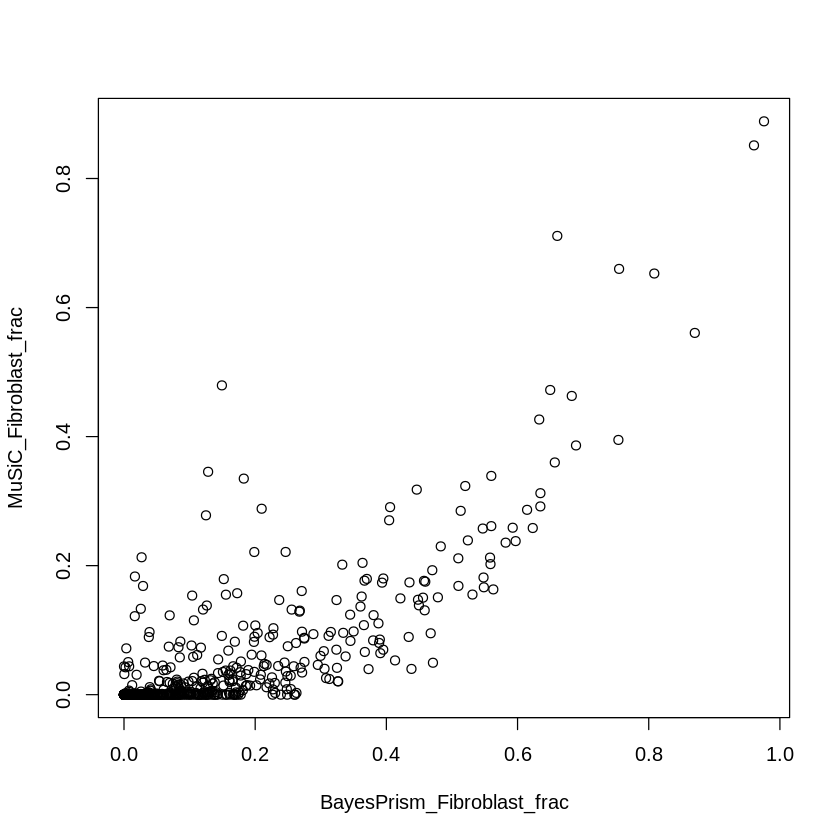

In [105]:
# fibroblast cell type fraction correlations
BayesPrism_Fibroblast_frac <- BP_res$Fibroblast
MuSiC_Fibroblast_frac <- MuSiC_res$Fibroblast
plot(BayesPrism_Fibroblast_frac,MuSiC_Fibroblast_frac)
# cor.test(res1$res$final.gibbs.thet$Fibroblast, Est.prop.tcga['Est.prop.weighted']$Fibroblast)

In [106]:
cor.test(BayesPrism_Fibroblast_frac,MuSiC_Fibroblast_frac)


	Pearson's product-moment correlation

data:  BayesPrism_Fibroblast_frac and MuSiC_Fibroblast_frac
t = 30.679, df = 544, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7631265 0.8248736
sample estimates:
      cor 
0.7960624 


In [120]:
# Jitter plot of estimated cell type proportions
jitter.fig = Jitter_Est(list(data.matrix(MuSiC_res),
                             data.matrix(BP_res),
                             data.matrix(BLADE_res),
                            data.matrix(NNLS_res)),
                        method.name = c('MuSiC', 'BayesPrism', 'BLADE','NNLS' ), title = 'Jitter plot of Est Proportions')

# A more sophisticated jitter plot is provided as below. We seperated the T2D subjects and normal 
#subjects by their HbA1c levels.

# m.prop.tcga = rbind(melt(Est.prop.tcga$Est.prop.weighted), 
#                         melt(Est.prop.tcga$Est.prop.allgene))

# colnames(m.prop.tcga) = c('Sub', 'CellType', 'Prop')
# m.prop.tcga$CellType = factor(m.prop.tcga$CellType, levels = unique(label$cell_category))
# m.prop.tcga$Method = factor(rep(c('MuSiC', 'NNLS'), each = 546*10), levels = c('MuSiC', 'NNLS'))
# m.prop.tcga$HbA1c = rep(GSE50244.bulk.eset$hba1c, 2*6)
# m.prop.tcga = m.prop.GSE50244[!is.na(m.prop.GSE50244$HbA1c), ]
# m.prop.tcga$Disease = factor(c('Normal', 'T2D')[(m.prop.GSE50244$HbA1c > 6.5)+1], levels = c('Normal', 'T2D'))
# m.prop.tcga$D = (m.prop.GSE50244$Disease == 'T2D')/5
# m.prop.tcga = rbind(subset(m.prop.GSE50244, Disease == 'Normal'), subset(m.prop.GSE50244, Disease != 'Normal'))

# jitter.new = ggplot(m.prop.GSE50244, aes(Method, Prop)) + 
#   geom_point(aes(fill = Method, color = Disease, stroke = D, shape = Disease), 
#              size = 2, alpha = 0.7, position = position_jitter(width=0.25, height=0)) +
#   facet_wrap(~ CellType, scales = 'free') + scale_colour_manual( values = c('white', "gray20")) +
#   scale_shape_manual(values = c(21, 24))+ theme_minimal()

# plot_grid(jitter.fig, jitter.new, labels = 'auto')

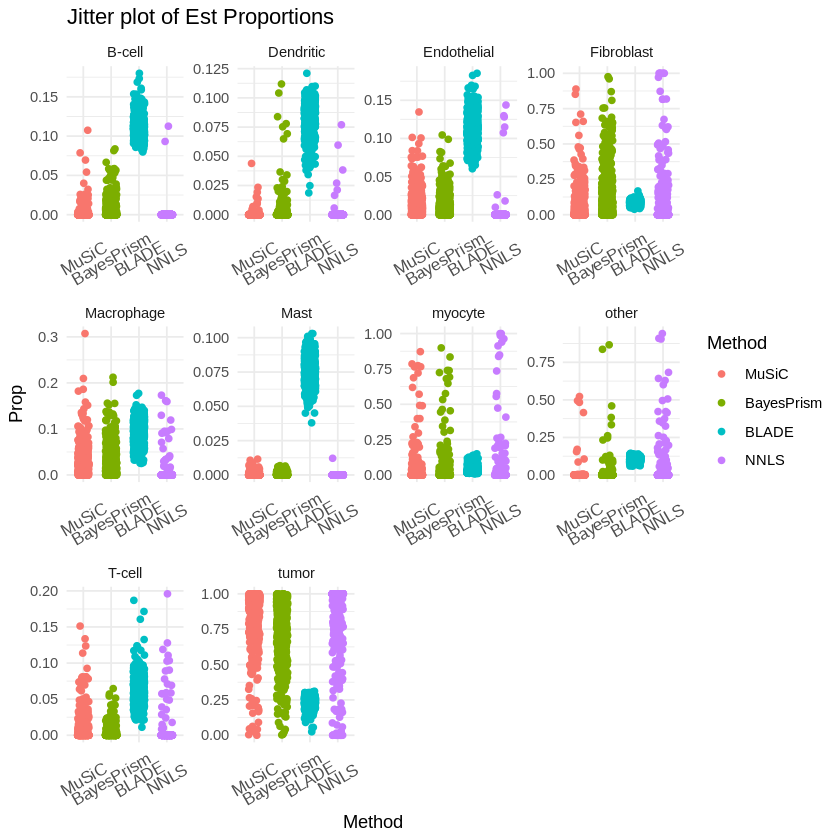

In [121]:
jitter.fig

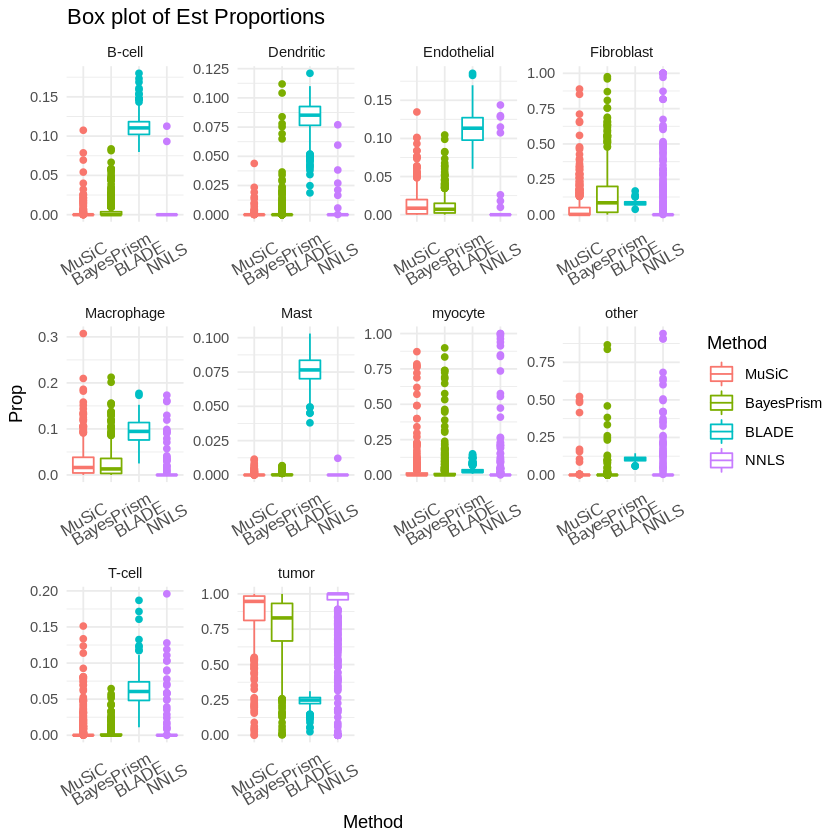

In [122]:
Boxplot_Est(list(data.matrix(MuSiC_res),
                             data.matrix(BP_res),
                             data.matrix(BLADE_res),
                            data.matrix(NNLS_res)),
                        method.name = c('MuSiC', 'BayesPrism', 'BLADE','NNLS' ), title = 'Box plot of Est Proportions')

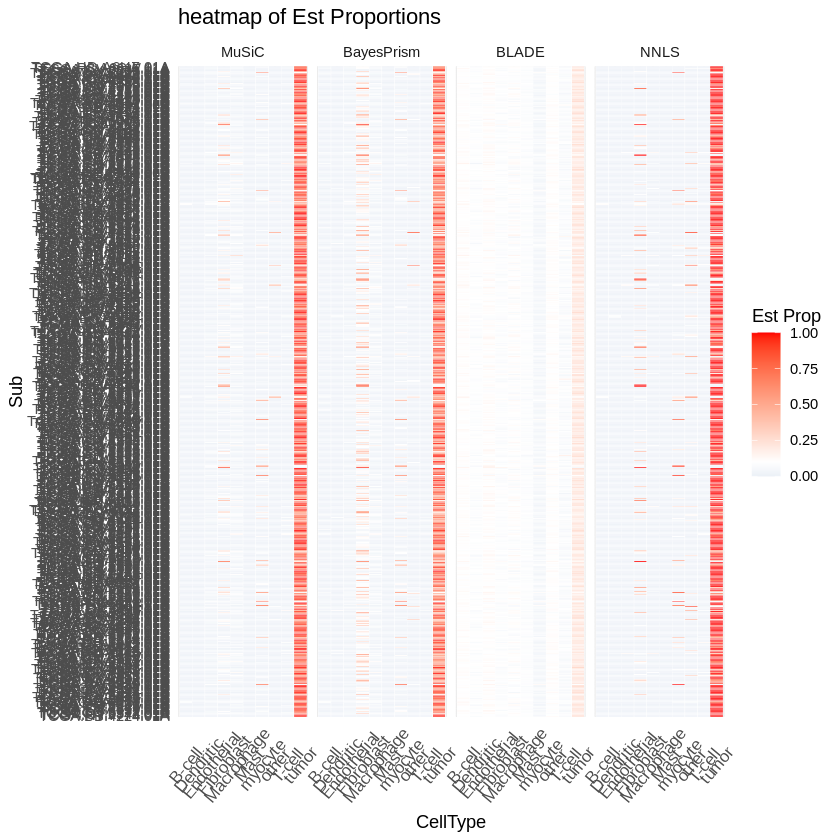

In [123]:
Prop_heat_Est(list(data.matrix(MuSiC_res),
                             data.matrix(BP_res),
                             data.matrix(BLADE_res),
                            data.matrix(NNLS_res)),
                        method.name = c('MuSiC', 'BayesPrism', 'BLADE','NNLS' ), title = 'heatmap of Est Proportions')

In [124]:
# pearson correlation between cell types from different methods
cor_music_bp <- cor(data.matrix(MuSiC_res),data.matrix(BP_res))
summary(cor_music_bp)

     B-cell           Dendritic         Endothelial        Fibroblast      
 Min.   :-0.25470   Min.   :-0.15136   Min.   :-0.4635   Min.   :-0.49435  
 1st Qu.: 0.09339   1st Qu.: 0.01813   1st Qu.: 0.1369   1st Qu.:-0.05986  
 Median : 0.17655   Median : 0.10285   Median : 0.2091   Median :-0.03413  
 Mean   : 0.22470   Mean   : 0.19175   Mean   : 0.2172   Mean   : 0.06503  
 3rd Qu.: 0.42328   3rd Qu.: 0.25803   3rd Qu.: 0.3050   3rd Qu.: 0.20094  
 Max.   : 0.57697   Max.   : 0.79908   Max.   : 0.8527   Max.   : 0.79606  
   Macrophage            Mast             myocyte             other          
 Min.   :-0.30120   Min.   :-0.07585   Min.   :-0.58332   Min.   :-0.241247  
 1st Qu.:-0.01054   1st Qu.:-0.03230   1st Qu.:-0.05362   1st Qu.:-0.008307  
 Median : 0.10150   Median : 0.10357   Median :-0.03266   Median : 0.003266  
 Mean   : 0.16338   Mean   : 0.12575   Mean   : 0.04717   Mean   : 0.081701  
 3rd Qu.: 0.26480   3rd Qu.: 0.16059   3rd Qu.: 0.02440   3rd Qu.: 0.060309  


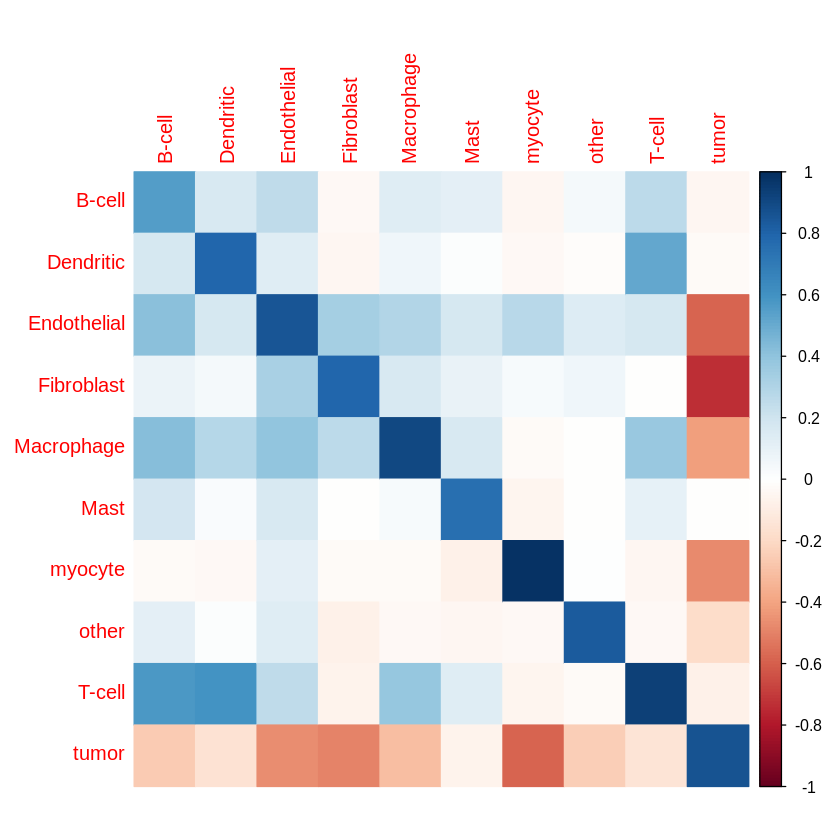

In [125]:
corrplot(cor_music_bp,method = 'color')

### Survival analysis, cell type proportion to survival
calculate median cell type prop for each cell type, asign two prop groups(high,low) for each cell type. Meier Kaplan log rank test analysis.

In [109]:
medMuSiC <- apply(data.matrix(Est.prop.tcga$Est.prop.weighted),2,median)
medBP <- apply(data.matrix(res1$res$final.gibbs.thet),2,median)

In [110]:
medMuSiC

Fibroblast       tumor      B cell     myocyte              Macrophage 
0.202140546 0.551693818 0.000000000 0.000000000 0.019837698 0.016804506 
Endothelial      T cell   Dendritic        Mast 
0.040984023 0.003040521 0.014968495 0.000000000

In [111]:
medBP

tumor   Fibroblast       B cell      myocyte                Macrophage 
8.629985e-01 6.257014e-02 9.581065e-07 1.469430e-05 4.010203e-07 8.695535e-03 
 Endothelial       T cell    Dendritic         Mast 
1.144804e-02 2.386648e-03 2.451334e-06 3.662864e-05